## Repos used for inspiration
- https://www.kaggle.com/code/arthurtok/spooky-nlp-and-topic-modelling-tutorial
- https://www.kaggle.com/code/hamditarek/fake-news-detection-on-twitter-eda/comments
- https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
- https://www.kaggle.com/code/jrreda/gensim-lda-topic-modeling/notebook

## Data sets
- https://www.kaggle.com/code/hamditarek/fake-news-detection-on-twitter-eda/input
- https://www.kaggle.com/datasets/Cornell-University/arxiv
- https://www.kaggle.com/datasets/johoetter/design-thinking-arxiv

### Step 0: Package Importation

Here we are importing all of our packages to ensure we can run all the necessary functions for our repo

In [6]:
#import packages as listed in the fake news repo
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)
import os
import gc
gc.enable()
import time
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from scipy import stats
%matplotlib inline
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')
import urllib        #for url stuff

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast


from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import os  # for os commands

import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

#input packages from Gensim LDA Topic Modeling not already imported
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from gensim.models import CoherenceModel
from tqdm.notebook import tqdm
import sys
from gensim.utils import ClippedCorpus
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

#input packages from medium article not already imported
import re
from gensim.utils import simple_preprocess
from pprint import pprint

#import from spooky NLP not already imported
import nltk
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from collections import Counter
#from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline

Loading BokehJS ...

### Step 1: Loading Data

In [13]:
# Read the CSV file into a pandas DataFrame
papers = pd.read_csv("/Users/jackmoody/Desktop/arxiv_papers.csv")

print(papers.columns)
#Some Statistics
papers.describe()

Index(['title', 'abstract', 'published', 'authors', 'url'], dtype='object')


,title,abstract,published,authors,url
count,8000,8000,8000,8000,8000
unique,7999,7999,7992,7915,8000
top,The Giant Radio Array for Neutrino Detection (...,Methods for extending -- generalizing or trans...,2021-11-08T17:02:32+00:00,"['Zhe Shen', 'Takeshi Tsuchiya']",http://arxiv.org/abs/2111.11418v1
freq,2,2,3,4,1


In [14]:
papers.head()

,title,abstract,published,authors,url
0,MetaFormer is Actually What You Need for Vision,Transformers have shown great potential in com...,2021-11-22T18:52:03+00:00,"['Weihao Yu', 'Mi Luo', 'Pan Zhou', 'Chenyang ...",http://arxiv.org/abs/2111.11418v1
1,Turbo Autoencoder with a Trainable Interleaver,A critical aspect of reliable communication in...,2021-11-22T18:37:03+00:00,"['Karl Chahine', 'Yihan Jiang', 'Pooja Nuti', ...",http://arxiv.org/abs/2111.11410v1
2,Ab-initio calculation of point defect equilibr...,Point defects are responsible for a wide range...,2021-11-22T17:11:17+00:00,"['Mubashir Mansoor', 'Mehya Mansoor', 'Maryam ...",http://arxiv.org/abs/2111.11359v1
3,Divergent electrostriction at ferroelectric ph...,We investigate the electrostrictive response a...,2021-11-22T17:00:32+00:00,"['Daniel S. P. Tanner', 'Pierre-Eymeric Janoli...",http://arxiv.org/abs/2111.11352v1
4,ProxyFL: Decentralized Federated Learning thro...,Institutions in highly regulated domains such ...,2021-11-22T16:47:39+00:00,"['Shivam Kalra', 'Junfeng Wen', 'Jesse C. Cres...",http://arxiv.org/abs/2111.11343v1


In [16]:
papers['authors'].value_counts().head(n=20)

authors
['Zhe Shen', 'Takeshi Tsuchiya']                                               4
['Dean Crnković', 'Andrea Švob']                                               3
['Wei-Chang Yeh']                                                              3
['Yu Li', 'Muhammad Monjurul Karim', 'Ruwen Qin']                              3
['Mihai Oltean']                                                               3
['Ahmad Kourani', 'Naseem Daher']                                              3
['Alireza Javaheri', 'Catarina Brites', 'Fernando Pereira', 'João Ascenso']    2
['Mohamed Abdelhamid', 'Aleksander Czekanski']                                 2
['Frank Lad']                                                                  2
['Masahiro Kojima']                                                            2
['Junyu Gao', 'Maoguo Gong', 'Xuelong Li']                                     2
['Mengyuan Ma', 'Nhan Thanh Nguyen', 'Markku Juntti']                          2
['Pornpat Sirithumgu

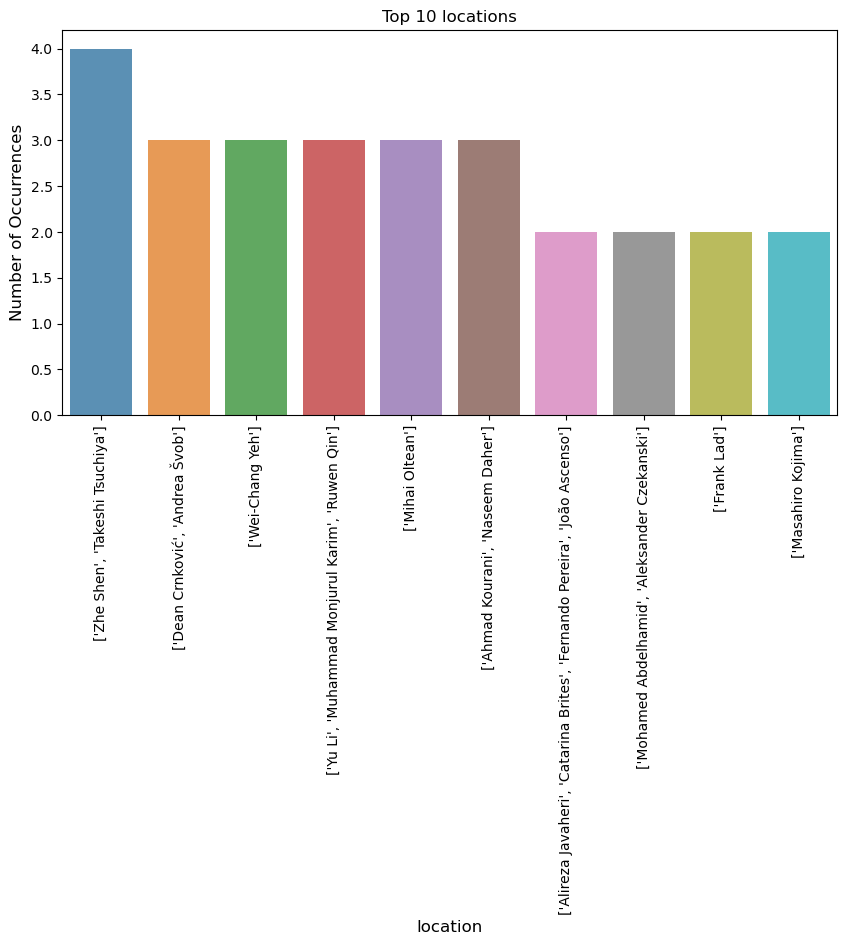

In [24]:
# Plotting a bar graph of the number of tweets in each location, for the first ten locations listed
# in the column 'location'
location_count  = papers['authors'].value_counts()
location_count = location_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(location_count.index, location_count.values, alpha=0.8)
plt.title('Top 10 Authors')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Authors', fontsize=12)
plt.xticks(rotation = 90)
plt.show()


In [7]:
all_words = papers['abstract'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

8000


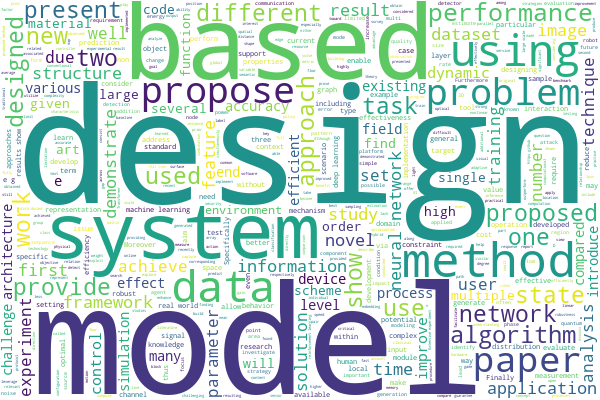

In [19]:
# plot the most common words using wordcloud

# we are interested in the text (sabstracts) only
dataset = papers.abstract.to_list()
print(len(dataset))  # number of abstracts

long_string = ','.join(list(dataset))
wordcloud = WordCloud(background_color="white", max_words=1000, width=600, height=400)
wordcloud.generate(long_string) # Visualize the word cloud
wordcloud.to_image()

### Step 2: Data Cleaning
Since the goal of this analysis is to perform topic modeling, we will solely focus on the text data from each paper, and drop other metadata columns

In [8]:
papers = papers.drop(columns=['title', 'published', 'authors', 'url'], axis=1)

# sample only 100 papers
papers = papers.sample(100)

# Print out the first rows of papers
papers.head()

,abstract
3625,Provably stable flux reconstruction (FR) schem...
3690,This article presents several design technique...
862,Mixing in low Reynolds number flow is difficul...
5956,Geometric compatibility constraints dictate th...
3215,Most of the existing neural video compression ...


##### Remove punctuation/lower casing

Next, let’s perform a simple preprocessing on the content of paper_text column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [26]:
# Remove punctuation
papers['abstract_processed'] = papers['abstract'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['abstract_processed'] = papers['abstract_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['abstract_processed'].head()

0    transformers have shown great potential in com...
1    a critical aspect of reliable communication in...
2    point defects are responsible for a wide range...
3    we investigate the electrostrictive response a...
4    institutions in highly regulated domains such ...
Name: abstract_processed, dtype: object

##### Tokenize words and further clean-up text

Let’s tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

The concept of tokenization is the act of taking a sequence of characters (think of Python strings) in a given document and dicing it up into its individual constituent pieces, which are the eponymous "tokens" of this method. One could loosely think of them as singular words in a sentence. One could naively implement the "split( )" method on a string which separates it into a python list based on the identifier in the argument. It is actually not that trivial

In [28]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = papers.abstract_processed.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

['transformers', 'have', 'shown', 'great', 'potential', 'in', 'computer', 'vision', 'tasks', 'common', 'belief', 'is', 'their', 'attention', 'based', 'token', 'mixer', 'module', 'contributes', 'most', 'to', 'their', 'competence', 'however', 'recent', 'works', 'show', 'the', 'attention', 'based']


** **
#### Step 3: Phrase Modeling: Bigram and Trigram Models
** **

Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring. Some examples in our example are: 'back_bumper', 'oil_leakage', 'maryland_college_park' etc.

Gensim's Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold.

*The higher the values of these param, the harder it is for words to be combined.*

In [29]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

#### Remove Stopwords, Make Bigrams and Lemmatize

The phrase models are ready. Let’s define the functions to remove the stopwords, make trigrams and lemmatization and call them sequentially.

As alluded to above stopwords are generally words that appear so commonly and at such a high frequency in the corpus that they don't actually contribute much to the learning or predictive process as a learning model would fail to distinguish it from other texts. Stopwordsinclude terms such as "to" or "the" and therefore, it would be to our benefit to remove them during the pre-processing phase. Conveniently, NLTK comes with a predefined list of 153 english stopwords.

In [30]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jackmoody/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

After removal of stopwords, the next stage of NLP that I would like to introduce is the process of Stemming. The work at this stage attempts to reduce as many different variations of similar words into a single term ( different branches all reduced to single word stem). Therefore if we have "running", "runs" and "run", you would really want these three distinct words to collapse into just the word "run". (However of course you lose granularity of the past, present or future tense).

We can turn to NLTK again which provides various stemmers which include variants such as the Porter stemming algorithm, the lancaster stemmer and the Snowball stemmer. In the following example, I will create a porter stemmer instance as follows:

In [32]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['transformer', 'show', 'great', 'potential', 'computer_vision', 'task', 'common', 'belief', 'attention', 'base', 'mixer', 'module', 'contribute', 'competence', 'however', 'recent', 'work', 'show', 'attention', 'base', 'module', 'transformer', 'replace', 'spatial', 'mlp', 'result', 'model', 'still', 'perform', 'quite']


### Step 3.5: Checking back on our fequency plots after data cleaning

** **
#### Step 4: Data transformation: Corpus and Dictionary
** **

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [34]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts] 
# create a frequency BOW from each article using the dictionary's `doc2bow` method

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 3), (3, 1), (4, 3), (5, 1), (6, 3), (7, 1), (8, 4), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


** **
#### Step 5: Base Model 
** **

We have everything required to train the base LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well. Apart from that, alpha and beta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior (we'll use default for the base model).

chunksize controls how many documents are processed at a time in the training algorithm. Increasing chunksize will speed up training, at least as long as the chunk of documents easily fit into memory.

passes controls how often we train the model on the entire corpus (set to 10). Another word for passes might be "epochs". iterations is somewhat technical, but essentially it controls how often we repeat a particular loop over each document. It is important to set the number of "passes" and "iterations" high enough.

In [35]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

** **
The above LDA model is built with 10 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

You can see the keywords for each topic and the weightage(importance) of each keyword using `lda_model.print_topics()`

In [36]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"design" + 0.010*"high" + 0.009*"system" + 0.009*"use" + '
  '0.006*"energy" + 0.006*"time" + 0.006*"quantum" + 0.006*"optical" + '
  '0.006*"base" + 0.005*"field"'),
 (1,
  '0.027*"model" + 0.015*"design" + 0.012*"datum" + 0.011*"base" + '
  '0.010*"learn" + 0.009*"propose" + 0.009*"performance" + 0.009*"use" + '
  '0.008*"training" + 0.008*"task"'),
 (2,
  '0.015*"design" + 0.012*"model" + 0.009*"method" + 0.007*"use" + '
  '0.007*"problem" + 0.007*"material" + 0.007*"structure" + 0.007*"function" + '
  '0.006*"result" + 0.006*"show"'),
 (3,
  '0.015*"quantum" + 0.009*"property" + 0.008*"molecule" + 0.007*"design" + '
  '0.007*"molecular" + 0.007*"metal" + 0.006*"phase" + 0.006*"material" + '
  '0.006*"chemical" + 0.006*"state"'),
 (4,
  '0.016*"network" + 0.015*"problem" + 0.012*"design" + 0.011*"time" + '
  '0.008*"algorithm" + 0.008*"optimal" + 0.008*"communication" + '
  '0.007*"propose" + 0.006*"number" + 0.006*"paper"'),
 (5,
  '0.019*"propose" + 0.015*"method" + 

### Step 6: Evalution
Evaluating an **LDA (Latent Dirichlet Allocation)** model is an important step in topic modeling to determine the effectiveness of the model in discovering underlying topics in a corpus of text documents. There are several methods for evaluating an **LDA** model, including:
​
- **Perplexity**: Perplexity is a commonly used metric for evaluating **LDA models**. It measures how well the model predicts new data. A lower perplexity score indicates better performance. You can calculate perplexity using the `log_perplexity()` method of the **LDA model** in `gensim`.
​
- **Coherence**: Coherence measures the degree of semantic similarity between the top *N* words in each topic. Higher coherence scores indicate better topic quality. You can calculate coherence using the `CoherenceModel` class in `gensim`.
​
- **Visualization**: Visualization can be used to visually inspect the quality of the topics generated by the **LDA model**. You can use the `pyLDAvis` package in Python to create interactive visualizations of the topics.
​
- **Human evaluation**: Finally, you can also perform human evaluation by having human annotators review the topics generated by the **LDA model** and provide feedback on the quality and interpretability of the topics.
​
In summary, evaluating an **LDA model** involves using one or more of the above methods to measure the quality of the topics generated by the model. By evaluating the model, you can make adjustments to the parameters and improve the quality of the topics.

In [37]:
lda_model.log_perplexity(corpus)   # Perplexity is a measure of how good the model is. lower the better.

-7.900614807582891

In [75]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized,
                                     dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)



Coherence Score: 0.39315624853813624

Perplexity:  -7.900599837980314


# Hyperparameter Tuning

First, let’s differentiate between model hyperparameters and model parameters :
1. Number of Topics (*K*)
2. Dirichlet hyperparameter *alpha*: Document-Topic Density
3. Dirichlet hyperparameter *beta*: Word-Topic Density

In [61]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = models.LdaModel(corpus=corpus, num_topics=k,
                                id2word=id2word, passes=10,
                                alpha=a, eta=b, chunksize=100,
                                per_word_topics=True, random_state=42)
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=data_lemmatized,
                                         dictionary=id2word, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [64]:
import numpy as np
from tqdm.notebook import tqdm
import sys
from gensim.utils import ClippedCorpus

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 6
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics+1, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')


# Validation sets
num_of_docs = len(corpus)
corpus_sets = [ClippedCorpus(corpus, int(num_of_docs*0.3)), corpus]
corpus_title = ['30% Corpus', '100% Corpus']

# results placeholder
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# tqdm progress bar
pbar = tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)),
                 file=sys.stdout, colour='green')

### takes ~ 12 hours
for i in range(len(corpus_sets)):
    for k in topics_range:    # iterate through validation corpuses
        for a in alpha:       # iterate through alpha values
            for b in beta:    # iterare through beta values
                # get the coherence score for the given parameters
                cv = compute_coherence_values(corpus=corpus_sets[i],
                                              dictionary=id2word,
                                              k=k, a=a, b=b)
                # Save the model results
                model_results['Validation_Set'].append(corpus_title[i])
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                
                # update tqdm progress bar
                pbar.update(1)
                pbar.refresh()
pbar.close()

# save the results to a dataframe
df = pd.DataFrame(model_results)

  0%|          | 0/300 [00:00<?, ?it/s]

In [76]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

Coherence Score:  0.39315624853813624

Perplexity:  -7.900623729122295


In [66]:
df.sort_values(by='Coherence', ascending=False).head()

,Validation_Set,Topics,Alpha,Beta,Coherence
148,75% Corpus,10,asymmetric,0.91,0.560872
118,75% Corpus,9,asymmetric,0.91,0.554669
88,75% Corpus,8,asymmetric,0.91,0.549203
63,75% Corpus,8,0.01,0.91,0.536575
138,75% Corpus,10,0.91,0.91,0.523657


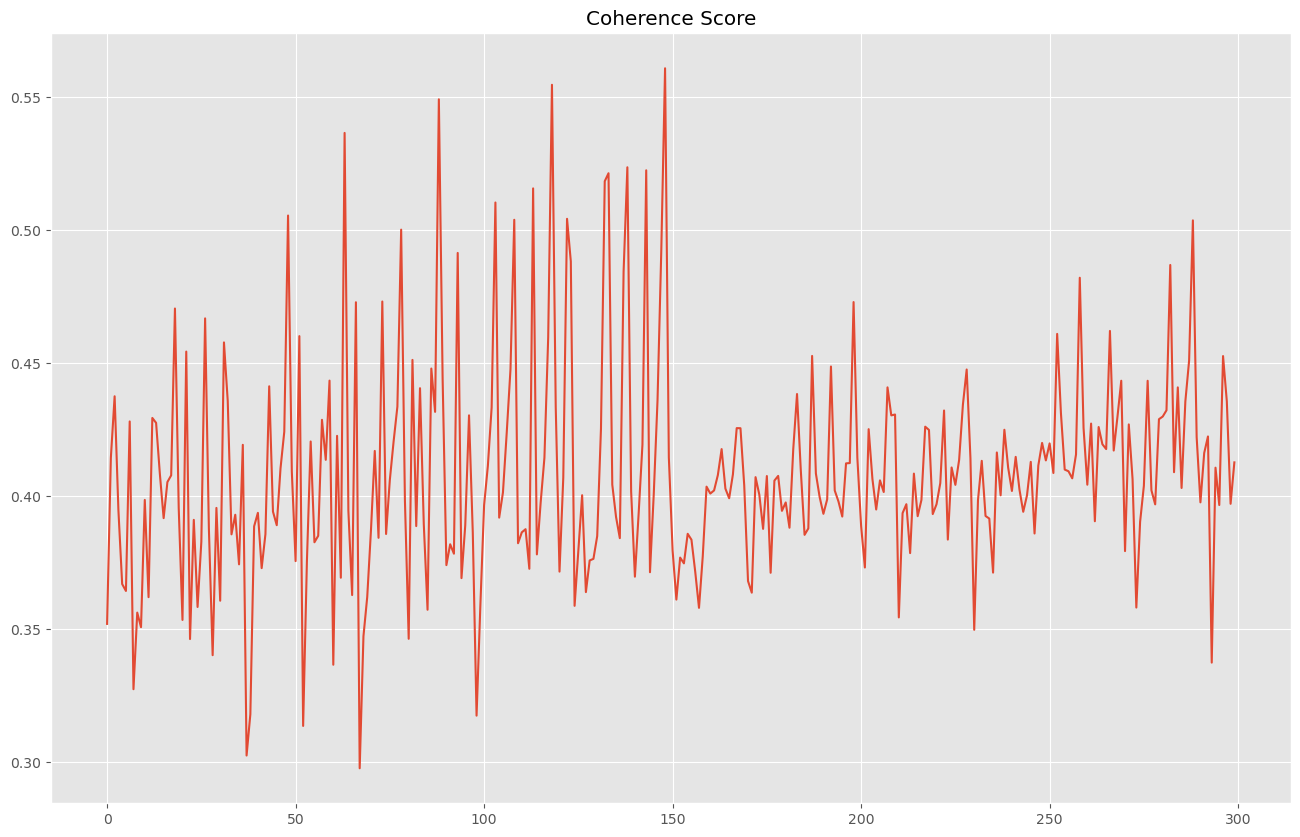

In [67]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df.Coherence.plot(kind='line', title='Coherence Score');

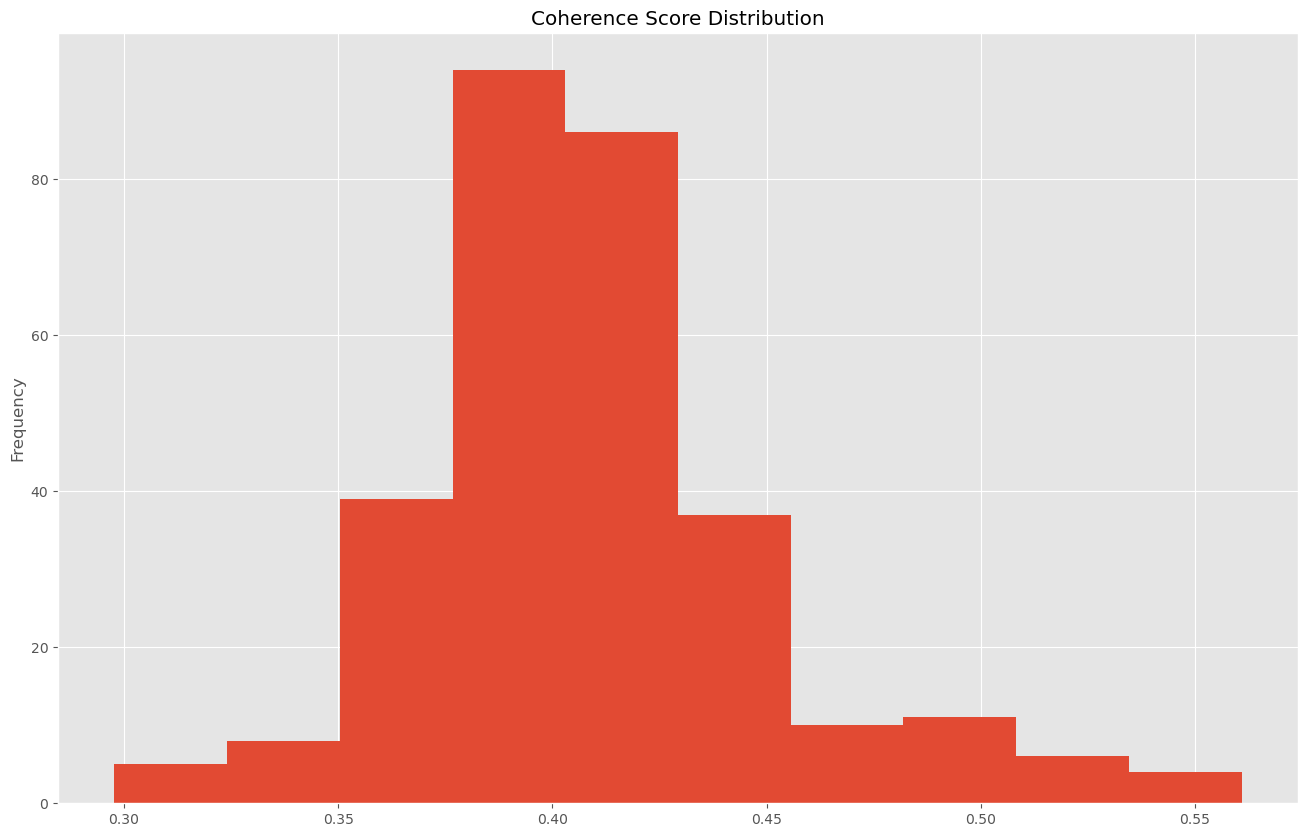

In [68]:
df.Coherence.plot(kind='hist', title='Coherence Score Distribution');

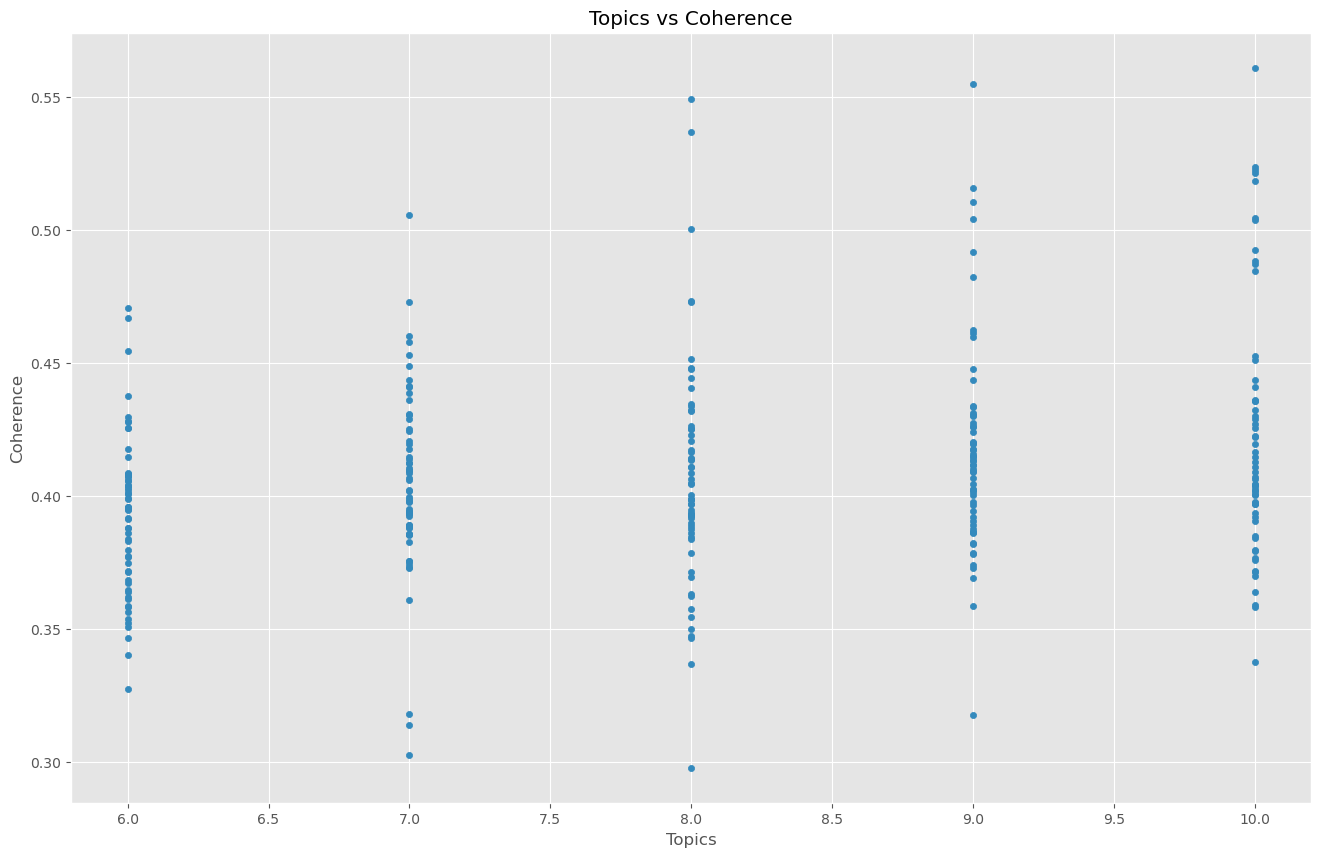

In [69]:
df.plot.scatter(x='Topics', y='Coherence', title='Topics vs Coherence');

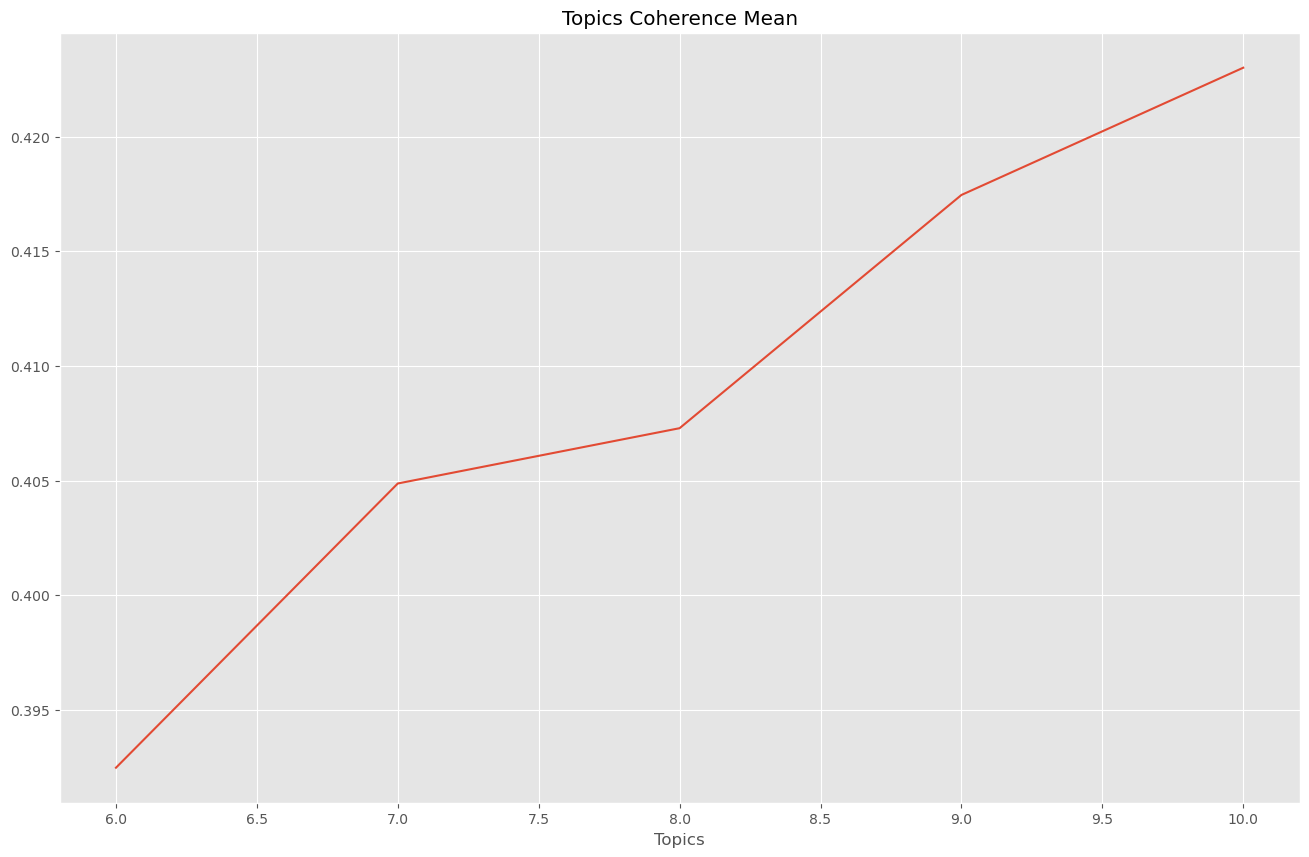

In [70]:
df.groupby('Topics')['Coherence'].mean().plot(title='Topics Coherence Mean');

In [83]:
# use the best parameters
best_model = models.LdaMulticore(corpus=corpus,
                                 id2word=id2word,
                                 num_topics=10, 
                                 random_state=42,
                                 chunksize=100,
                                 passes=100,
                                 alpha='asymmetric',
                                 eta=0.91)

best_model.print_topics()

[(0,
  '0.015*"design" + 0.010*"system" + 0.008*"model" + 0.007*"base" + 0.007*"propose" + 0.007*"use" + 0.007*"problem" + 0.006*"datum" + 0.006*"time" + 0.005*"paper"'),
 (1,
  '0.011*"design" + 0.007*"use" + 0.007*"high" + 0.005*"material" + 0.005*"system" + 0.005*"field" + 0.004*"energy" + 0.004*"result" + 0.004*"base" + 0.004*"structure"'),
 (2,
  '0.015*"quantum" + 0.010*"student" + 0.003*"qubit" + 0.003*"course" + 0.002*"circuit" + 0.002*"teach" + 0.002*"school" + 0.001*"entanglement" + 0.001*"unitary" + 0.001*"teaching"'),
 (3,
  '0.002*"refactoring" + 0.002*"bug" + 0.001*"mutation" + 0.001*"vaccine" + 0.001*"tee" + 0.001*"firm" + 0.001*"narrative" + 0.001*"equity" + 0.001*"infographic" + 0.001*"refactore"'),
 (4,
  '0.018*"model" + 0.012*"method" + 0.010*"propose" + 0.010*"learn" + 0.009*"design" + 0.009*"image" + 0.008*"base" + 0.008*"network" + 0.008*"task" + 0.008*"dataset"'),
 (5,
  '0.009*"patient" + 0.004*"covid" + 0.004*"disease" + 0.004*"clinical" + 0.002*"treatment" + 

In [82]:
# ASSERT Coherence Score 
coherence_model_lda = CoherenceModel(model=best_model, texts=data_lemmatized,
                                     dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.3441054685127889


In [73]:
print(best_model.alpha) # Document-topic prior
print(best_model.eta)   # Topic-word prior (beta)

[0.38961035 0.25974026 0.19480518 0.15584415]
[0.9 0.9 0.9 ... 0.9 0.9 0.9]


In [74]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the topics
pyLDAvis.enable_notebook()
p = gensimvis.prepare(best_model, corpus,id2word)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.114319  0.032618       1        1  34.607750
0     -0.051402 -0.004776       2        1  34.498433
1      0.056538 -0.123908       3        1  20.065288
2      0.109184  0.096067       4        1  10.828529, topic_info=          Term         Freq        Total Category  logprob  loglift
321    problem  3190.000000  3190.000000  Default  30.0000  30.0000
304      image  2444.000000  2444.000000  Default  29.0000  29.0000
282    dataset  1930.000000  1930.000000  Default  28.0000  28.0000
123      learn  3386.000000  3386.000000  Default  27.0000  27.0000
226     system  5017.000000  5017.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
92        also   282.721569  2175.273514   Topic4  -5.7597   0.1825
53   parameter   252.066851  1231.752802   Topic4  -5.8744   0.6365
47       model   341.923472  7735.137563   Topic4  -5.5695  -0.8960
132      paper   259.852968  3065.357829   Topic4  -5.8440  -0.2448
137    provide   256.809586  2578.958778   Topic4  -5.8558  -0.0838

[336 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2290      1  0.007757  absorption
2290      2  0.007757  absorption
2290      3  0.977345  absorption
2290      4  0.007757  absorption
704       1  0.080673      access
...     ...       ...         ...
88        4  0.097711        well
1012      1  0.003619    wireless
1012      2  0.991590    wireless
1012      3  0.003619    wireless
1012      4  0.003619    wireless

[1072 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])